# Cross Selling Strategy

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
df=pd.read_excel(r"C:\Users\puspa\Downloads\Insurance_Data_50k.xlsx")

In [4]:
df.head()

,Age,Gender,Marital Status,Family Members,Education,Occupation,Job Title,Income,Current Product,Current Product Type,Current_Coverage,New Product Type,New_Coverage,Rating,Converted,Status
0,30.0,F,Divorced,2.0,LHS,SPT,PG,1.948181,No,NO,-20709.0,INV,2155940.0,Cold,Converted,Converted
1,48.0,M,Divorced,3.0,LHS,SFT,OC,6.372918,No,NO,-52383.0,TLE,991685.0,Warm,Converted,Converted
2,53.0,M,Married,4.0,NE,SPT,PG,5.820387,Yes,NO,4018892.0,ANS,1972325.0,Cold,NotConverted,AS
3,45.0,M,Married,2.0,PD,SFT,RR,1.230810,No,ANS,34644.0,ANS,3932434.0,Warm,NotConverted,Converted
4,37.0,M,Married,3.0,BD,SPT,BA,1.165025,No,NO,27473.0,TLE,1984786.0,Hot,NotConverted,Converted


In [6]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Family Members', 'Education',
       'Occupation', 'Job Title', 'Income', 'Current Product',
       'Current Product Type', 'Current_Coverage', 'New Product Type',
       'New_Coverage', 'Rating', 'Converted', 'Status'],
      dtype='object')

# Data Preparation

In [24]:
df.columns=[re.sub(r'[\s/]+', '_', x.strip()) for x in df.columns]

In [27]:
df.shape

(50000, 16)

# Data Understanding

In [14]:
for col in df.columns:
    print("The unique values in each column", col)
    print(df[col].unique())
    #print("\n")

The unique values in each column Age
[30. 48. 53. 45. 37. 47. 58. 49. 40. 43. 33. 25. 20. 31. 59. 50. 27. 23.
 26. 56. 28. 35. 51. 22. 24. 39. 36. 38. 34. 42. 21. 54. 55. 32. 41. 18.
 57. 46. 52. 29. 60. 44. 19. nan]
The unique values in each column Gender
['F' 'M' nan]
The unique values in each column Marital Status
['Divorced' 'Married' 'Single' nan]
The unique values in each column Family Members
[ 2.  3.  4.  5.  7.  6.  9. 10.  8.  1. nan]
The unique values in each column Education
['LHS' 'NE' 'PD' 'BD' 'MD' 'UHS' nan]
The unique values in each column Occupation
['SPT' 'SFT' 'SE' nan]
The unique values in each column Job Title
['PG' 'OC' 'RR' 'BA' 'FH' 'CB' 'PA' 'PR' 'OT' 'DD' 'CF' 'OM' nan]
The unique values in each column Income
[1.94818057 6.37291823 5.82038691 ... 2.5993835  5.04113262 1.53097298]
The unique values in each column Current Product
['No' 'Yes' nan]
The unique values in each column Current Product Type
['NO' 'ANS' 'INV' 'PMT' 'END' 'TLE' nan]
The unique values in 

In [25]:
df.isnull().sum()

Age                      0
Gender                  91
Marital_Status          21
Family_Members          11
Education               23
Occupation              22
Job_Title               62
Income                  49
Current_Product          9
Current_Product_Type    16
Current_Coverage        24
New_Product_Type        24
New_Coverage            64
Rating                  22
Converted               24
Status                   0
dtype: int64

# Data Engineering Strategy

## Data Cleaning

## Handling nullvalues(Age,family_members,Categorical)

## Age

In [17]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
print(age_mean, age_median)

38.97957101124495 39.0


In [18]:
replace = age_mean if age_mean < age_median else age_median
print(replace)

38.97957101124495


In [21]:
df['Age'].fillna(replace, inplace=True)
print(f"Age missing values filled with mean: {age_mean}")

Age missing values filled with mean: 38.97957101124495


In [22]:
df['Age'].isnull().sum()

np.int64(0)

## Family_Members

In [28]:
f_mean=df['Family_Members'].mean()
f_median=df['Family_Members'].median()
print(f_mean,f_median)

4.658804937086159 4.0


In [30]:
replace = f_mean if f_mean < f_median else f_median
replace

4.0

In [31]:
df['Family_Members'].fillna(replace, inplace=True)
print(f"Family_Members missing values filled with median: {replace}")

Family_Members missing values filled with median: 4.0


In [32]:
df.dtypes

Age                     float64
Gender                   object
Marital_Status           object
Family_Members          float64
Education                object
Occupation               object
Job_Title                object
Income                  float64
Current_Product          object
Current_Product_Type     object
Current_Coverage        float64
New_Product_Type         object
New_Coverage            float64
Rating                   object
Converted                object
Status                   object
dtype: object

## Education,Occupation,Job_title,New_product_type,Rating

In [35]:
c_cols = ['Education', 'Occupation', 'Job_Title', 'New_Product_Type', 'Rating']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"Variable {col} missing values filled with mode: {df[col].mode()[0]}")

Variable Education missing values filled with mode: BD
Variable Occupation missing values filled with mode: SPT
Variable Job_Title missing values filled with mode: FH
Variable New_Product_Type missing values filled with mode: ANS
Variable Rating missing values filled with mode: Cold


## Handling Income 

In [36]:
income_mean = df.groupby('Occupation')['Income'].mean()
income_median = df.groupby('Occupation')['Income'].median()

In [37]:
income_mean

Occupation
SE     4.942213
SFT    4.922825
SPT    4.994900
Name: Income, dtype: float64

In [38]:
income_median

Occupation
SE     3.016083
SFT    3.006347
SPT    3.060040
Name: Income, dtype: float64

In [40]:
# Apply imputation logic
for occ, mean in income_mean.items():
    median = income_median[occ]

    # Choose the smaller of mean or median
    imputation_value = min(mean, median)

    # Find rows where Occupation matches and Income is missing
    mask = (df['Occupation'] == occ) & (df['Income'].isna())

    # Fill missing values
    df.loc[mask, 'Income'] = imputation_value

    print(f"Occupation: {occ}, Mean: {mean:.2f}, Median: {median:.2f}, Imputed with: {imputation_value:.2f}")

print(f"\nIncome missing values left: {df['Income'].isna().sum()}")

Occupation: SE, Mean: 4.94, Median: 3.02, Imputed with: 3.02
Occupation: SFT, Mean: 4.92, Median: 3.01, Imputed with: 3.01
Occupation: SPT, Mean: 4.99, Median: 3.06, Imputed with: 3.06

Income missing values left: 0


In [41]:
df['Income'].isnull().sum()

np.int64(0)

## Handling Current_Product,Type,Coverage

## Current product

In [43]:
c1 = df['Current_Product'].isna()
df[c1]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3057,34.0,M,Married,2.0,BD,SPT,CB,9.268115,NaN,NO,46806.0,ANS,2933667.0,Warm,Converted,Converted
4687,42.0,F,Married,2.0,MD,SPT,FH,9.353734,NaN,NO,68337.0,ANS,2996273.0,Cold,Converted,Converted
6151,28.0,F,Married,7.0,UHS,SPT,FH,4.799321,NaN,NO,984326.0,ANS,2967208.0,Hot,Converted,NW
18058,44.0,M,Married,9.0,BD,SE,OT,2.028398,NaN,PMT,106040.0,ANS,15028047.0,Cold,NotConverted,QG
20282,34.0,F,Married,10.0,PD,SPT,FH,9.291435,NaN,END,60401.0,END,4989096.0,Cold,NotConverted,AS
22396,56.0,F,Married,7.0,LHS,SPT,PG,3.529270,NaN,PMT,-30483.0,ANS,2032073.0,Cold,NotConverted,PW
23094,39.0,F,Divorced,1.0,LHS,SE,PR,7.921574,NaN,NO,3017127.0,INV,1057781.0,Hot,NotConverted,Converted
44320,22.0,M,Married,4.0,NE,SPT,FH,1.943869,NaN,TLE,2936075.0,ANS,4081902.0,Cold,Converted,PN
46676,28.0,F,Divorced,4.0,BD,SPT,DD,6.526767,NaN,ANS,-12088.0,ANS,1985458.0,Warm,NotConverted,QG


In [44]:
df[c1].index

Index([3057, 4687, 6151, 18058, 20282, 22396, 23094, 44320, 46676], dtype='int64')

In [47]:
missing_idx = df[df['Current_Product'].isna()].index
missing_idx

Index([3057, 4687, 6151, 18058, 20282, 22396, 23094, 44320, 46676], dtype='int64')

In [49]:
subset_data = df.loc[missing_idx]
subset_data.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3057,34.0,M,Married,2.0,BD,SPT,CB,9.268115,NaN,NO,46806.0,ANS,2933667.0,Warm,Converted,Converted
4687,42.0,F,Married,2.0,MD,SPT,FH,9.353734,NaN,NO,68337.0,ANS,2996273.0,Cold,Converted,Converted
6151,28.0,F,Married,7.0,UHS,SPT,FH,4.799321,NaN,NO,984326.0,ANS,2967208.0,Hot,Converted,NW
18058,44.0,M,Married,9.0,BD,SE,OT,2.028398,NaN,PMT,106040.0,ANS,15028047.0,Cold,NotConverted,QG
20282,34.0,F,Married,10.0,PD,SPT,FH,9.291435,NaN,END,60401.0,END,4989096.0,Cold,NotConverted,AS


In [50]:
subset_data = df.loc[missing_idx]
product_type_no = (subset_data['Current_Product_Type'] == 'NO')
coverage_zero = (subset_data['Current_Coverage'] == 0.0)

In [51]:
subset_data[product_type_no| coverage_zero]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3057,34.0,M,Married,2.0,BD,SPT,CB,9.268115,NaN,NO,46806.0,ANS,2933667.0,Warm,Converted,Converted
4687,42.0,F,Married,2.0,MD,SPT,FH,9.353734,NaN,NO,68337.0,ANS,2996273.0,Cold,Converted,Converted
6151,28.0,F,Married,7.0,UHS,SPT,FH,4.799321,NaN,NO,984326.0,ANS,2967208.0,Hot,Converted,NW
23094,39.0,F,Divorced,1.0,LHS,SE,PR,7.921574,NaN,NO,3017127.0,INV,1057781.0,Hot,NotConverted,Converted


In [53]:
indices_fix = subset_data[product_type_no| coverage_zero].index
indices_fix

Index([3057, 4687, 6151, 23094], dtype='int64')

In [54]:
df.loc[indices_fix, 'Current_Product'] = 'No'

In [55]:
df['Current_Product'].isnull().sum()

np.int64(5)

In [56]:
df['Current_Product'].fillna('Yes', inplace=True)

In [57]:
df['Current_Product'].value_counts()

Current_Product
Yes    28442
No     21558
Name: count, dtype: int64

In [58]:
df['Current_Product'].isnull().sum()

np.int64(0)

## Current Product Type

In [61]:
product_col = 'Current_Product_Type'

In [62]:
product_col

'Current_Product_Type'

In [64]:
c2 = df[product_col].isna()
df[c2].head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
542,57.0,F,Single,4.0,BD,SE,PG,9.482241,Yes,NaN,15088033.0,ANS,15001049.0,Warm,Converted,ARS
605,26.0,F,Married,9.0,PD,SPT,FH,1.596241,Yes,NaN,1984585.0,ANS,14899846.0,Cold,Converted,NW
1977,18.0,F,Single,5.0,NE,SE,FH,1.489661,Yes,NaN,46075.0,TLE,4086659.0,Warm,NotConverted,NW
2037,37.0,F,Single,10.0,MD,SE,OM,1.149414,Yes,NaN,-59423.0,INV,14989910.0,Hot,NotConverted,Converted
3051,24.0,F,Married,10.0,BD,SE,OT,10.020080,Yes,NaN,3052414.0,TLE,2973748.0,Hot,NotConverted,Converted


In [65]:
product_col = 'Current_Product_Type'
missing_cpt_idx = df[df[product_col].isna()].index

In [66]:
missing_cpt_idx

Index([  542,   605,  1977,  2037,  3051,  6986,  8947,  9268, 11706, 15549,
       16402, 20439, 26622, 34146, 36138, 44087],
      dtype='int64')

In [67]:
subset_check = df.loc[missing_cpt_idx]

status_no = (subset_check['Current_Product'] == 'No')
coverage_zero = (subset_check['Current_Coverage'] == 0.0)

In [69]:
subset_check[status_no | coverage_zero]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
8947,21.0,F,Single,2.0,BD,SE,FH,9.888404,No,NaN,-27264.0,ANS,3984153.0,Cold,NotConverted,Converted
9268,49.0,M,Divorced,1.0,MD,SPT,DD,1.071099,No,NaN,929132.0,TLE,973267.0,Hot,Converted,AS
15549,32.0,F,Divorced,3.0,NE,SE,PG,7.209802,No,NaN,-2248.0,ANS,1976874.0,Hot,Converted,PW
16402,23.0,M,Divorced,1.0,LHS,SPT,PG,2.967610,No,NaN,999603.0,END,15068381.0,Cold,NotConverted,PS
26622,34.0,M,Single,5.0,BD,SPT,FH,7.213070,No,NaN,15002045.0,END,1074398.0,Hot,NotConverted,PP
34146,51.0,F,Married,1.0,LHS,SPT,PG,2.002088,No,NaN,-70360.0,ANS,1006880.0,Warm,Converted,Converted


In [70]:
indices_impute = subset_check[status_no | coverage_zero].index
indices_impute

Index([8947, 9268, 15549, 16402, 26622, 34146], dtype='int64')

In [72]:
indices_impute = subset_check[status_no | coverage_zero].index

df.loc[indices_impute, product_col] = 'NO'

In [74]:
df['Current_Product_Type'].isnull().sum()

np.int64(10)

In [76]:
remaining_missing_idx = df[df[product_col].isna()].index
remaining_missing_idx

Index([542, 605, 1977, 2037, 3051, 6986, 11706, 20439, 36138, 44087], dtype='int64')

In [77]:
df.loc[remaining_missing_idx]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
542,57.0,F,Single,4.0,BD,SE,PG,9.482241,Yes,NaN,15088033.0,ANS,15001049.0,Warm,Converted,ARS
605,26.0,F,Married,9.0,PD,SPT,FH,1.596241,Yes,NaN,1984585.0,ANS,14899846.0,Cold,Converted,NW
1977,18.0,F,Single,5.0,NE,SE,FH,1.489661,Yes,NaN,46075.0,TLE,4086659.0,Warm,NotConverted,NW
2037,37.0,F,Single,10.0,MD,SE,OM,1.149414,Yes,NaN,-59423.0,INV,14989910.0,Hot,NotConverted,Converted
3051,24.0,F,Married,10.0,BD,SE,OT,10.020080,Yes,NaN,3052414.0,TLE,2973748.0,Hot,NotConverted,Converted
6986,30.0,M,Married,2.0,LHS,SE,PG,9.437539,Yes,NaN,14987708.0,TLE,1018979.0,Warm,NotConverted,AS
11706,48.0,F,Married,7.0,MD,SE,FH,4.307219,Yes,NaN,15011187.0,ANS,14981939.0,Cold,Converted,Converted
20439,41.0,M,Divorced,2.0,LHS,SE,PG,2.007712,Yes,NaN,25045.0,INV,1038962.0,Cold,NotConverted,Converted
36138,44.0,F,Single,2.0,UHS,SE,FH,5.866036,Yes,NaN,15050706.0,ANS,1022276.0,Hot,NotConverted,Converted
44087,21.0,F,Married,1.0,BD,SFT,DD,2.247051,Yes,NaN,2037604.0,PMT,4061090.0,Cold,NotConverted,PW


In [78]:
df['Current_Product_Type'].mode()[0]

'NO'

In [79]:
c2 = df['Current_Product_Type'] != 'NO'

df[c2].head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3,45.0,M,Married,2.0,PD,SFT,RR,1.230810,No,ANS,34644.0,ANS,3932434.0,Warm,NotConverted,Converted
6,58.0,F,Married,2.0,LHS,SE,RR,8.977828,Yes,INV,19557.0,END,985299.0,Hot,NotConverted,PS
7,49.0,F,Divorced,7.0,LHS,SE,PG,9.532018,No,PMT,59030.0,END,1022635.0,Cold,NotConverted,Converted
8,40.0,F,Married,6.0,PD,SPT,FH,1.471154,Yes,ANS,15004736.0,TLE,2946612.0,Hot,Converted,PS
10,33.0,F,Married,5.0,UHS,SE,BA,2.281249,Yes,END,2073883.0,ANS,14965529.0,Warm,NotConverted,NW


In [81]:
existing_customers = df[c2]

In [82]:
existing_customers['Current_Product_Type'].mode()

0    ANS
Name: Current_Product_Type, dtype: object

In [83]:
existing_customers['Current_Product_Type'].mode()[0]

'ANS'

In [84]:
df['Current_Product_Type'].fillna(existing_customers['Current_Product_Type'].mode()[0], inplace =  True)

In [86]:
df['Current_Product_Type'].isnull().sum()

np.int64(0)

## Current Coverage

In [87]:
df[df['Current_Coverage'].isna()]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
533,58.0,M,Married,7.0,BD,SPT,PR,6.943778,No,NO,NaN,TLE,979835.0,Cold,Converted,QG
937,51.0,F,Divorced,8.0,BD,SPT,PG,1.494430,No,ANS,NaN,INV,14975006.0,Cold,Converted,PW
5288,55.0,F,Married,9.0,LHS,SE,FH,2.890881,Yes,NO,NaN,PMT,1092594.0,Cold,NotConverted,Converted
12729,56.0,M,Single,2.0,UHS,SPT,PR,2.240885,No,NO,NaN,ANS,2937499.0,Warm,NotConverted,ARS
12789,33.0,F,Married,5.0,MD,SPT,FH,9.053884,Yes,NO,NaN,PMT,1024521.0,Hot,NotConverted,NW
14781,24.0,M,Married,6.0,BD,SE,BA,1.249415,No,PMT,NaN,TLE,1949558.0,Cold,NotConverted,PW
15757,56.0,M,Single,3.0,MD,SPT,OM,3.040422,Yes,TLE,NaN,END,4084515.0,Warm,NotConverted,Converted
17876,57.0,M,Married,1.0,BD,SE,BA,9.784469,No,NO,NaN,END,2077372.0,Warm,Converted,ARS
18632,18.0,F,Married,9.0,BD,SPT,PR,9.296060,No,END,NaN,INV,1996759.0,Cold,Converted,PS
19063,45.0,M,Single,1.0,BD,SFT,PG,4.778030,Yes,NO,NaN,TLE,14971228.0,Warm,Converted,AS


In [88]:
missing_coverage_idx = df[df['Current_Coverage'].isna()].index
missing_coverage_idx

Index([  533,   937,  5288, 12729, 12789, 14781, 15757, 17876, 18632, 19063,
       19728, 21488, 21587, 26193, 32712, 32795, 36326, 40787, 40990, 44788,
       45842, 48819, 49595, 49812],
      dtype='int64')

In [89]:
subset_cvg_miss_data = df.loc[missing_coverage_idx]
subset_cvg_miss_data

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
533,58.0,M,Married,7.0,BD,SPT,PR,6.943778,No,NO,NaN,TLE,979835.0,Cold,Converted,QG
937,51.0,F,Divorced,8.0,BD,SPT,PG,1.494430,No,ANS,NaN,INV,14975006.0,Cold,Converted,PW
5288,55.0,F,Married,9.0,LHS,SE,FH,2.890881,Yes,NO,NaN,PMT,1092594.0,Cold,NotConverted,Converted
12729,56.0,M,Single,2.0,UHS,SPT,PR,2.240885,No,NO,NaN,ANS,2937499.0,Warm,NotConverted,ARS
12789,33.0,F,Married,5.0,MD,SPT,FH,9.053884,Yes,NO,NaN,PMT,1024521.0,Hot,NotConverted,NW
14781,24.0,M,Married,6.0,BD,SE,BA,1.249415,No,PMT,NaN,TLE,1949558.0,Cold,NotConverted,PW
15757,56.0,M,Single,3.0,MD,SPT,OM,3.040422,Yes,TLE,NaN,END,4084515.0,Warm,NotConverted,Converted
17876,57.0,M,Married,1.0,BD,SE,BA,9.784469,No,NO,NaN,END,2077372.0,Warm,Converted,ARS
18632,18.0,F,Married,9.0,BD,SPT,PR,9.296060,No,END,NaN,INV,1996759.0,Cold,Converted,PS
19063,45.0,M,Single,1.0,BD,SFT,PG,4.778030,Yes,NO,NaN,TLE,14971228.0,Warm,Converted,AS


In [90]:
product_type_no = (subset_cvg_miss_data['Current_Product_Type'] == 'NO')
status_no = (subset_cvg_miss_data['Current_Product'] == 'No')

In [91]:
subset_cvg_miss_data[product_type_no| status_no]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
533,58.0,M,Married,7.0,BD,SPT,PR,6.943778,No,NO,NaN,TLE,979835.0,Cold,Converted,QG
937,51.0,F,Divorced,8.0,BD,SPT,PG,1.494430,No,ANS,NaN,INV,14975006.0,Cold,Converted,PW
5288,55.0,F,Married,9.0,LHS,SE,FH,2.890881,Yes,NO,NaN,PMT,1092594.0,Cold,NotConverted,Converted
12729,56.0,M,Single,2.0,UHS,SPT,PR,2.240885,No,NO,NaN,ANS,2937499.0,Warm,NotConverted,ARS
12789,33.0,F,Married,5.0,MD,SPT,FH,9.053884,Yes,NO,NaN,PMT,1024521.0,Hot,NotConverted,NW
14781,24.0,M,Married,6.0,BD,SE,BA,1.249415,No,PMT,NaN,TLE,1949558.0,Cold,NotConverted,PW
17876,57.0,M,Married,1.0,BD,SE,BA,9.784469,No,NO,NaN,END,2077372.0,Warm,Converted,ARS
18632,18.0,F,Married,9.0,BD,SPT,PR,9.296060,No,END,NaN,INV,1996759.0,Cold,Converted,PS
19063,45.0,M,Single,1.0,BD,SFT,PG,4.778030,Yes,NO,NaN,TLE,14971228.0,Warm,Converted,AS
19728,44.0,M,Single,3.0,NE,SFT,RR,2.105497,No,ANS,NaN,TLE,15064654.0,Warm,NotConverted,PP


In [92]:
indices_to_fix = subset_cvg_miss_data[product_type_no| status_no].index
indices_to_fix

Index([  533,   937,  5288, 12729, 12789, 14781, 17876, 18632, 19063, 19728,
       21587, 26193, 32795, 36326, 45842, 49595, 49812],
      dtype='int64')

In [93]:
df.loc[indices_to_fix, 'Current_Coverage'] = 0.0

In [94]:
df['Current_Coverage'].isnull().sum()

np.int64(7)

In [96]:
c1 = df['Current_Coverage'].isnull()
coverage_missing_idx = df[c1].index

In [97]:
coverage_missing_idx

Index([15757, 21488, 32712, 40787, 40990, 44788, 48819], dtype='int64')

In [99]:
coverage_missing_df = df.loc[coverage_missing_idx]

In [ ]:
coverage_missing_df

In [100]:
coverage_col = 'Current_Coverage'
remaining_missing_idx = df[df[coverage_col].isna()].index

if not remaining_missing_idx.empty:
    # Calculate group mean/median for non-NO types
    non_no_data = df[df['Current_Product_Type'] != 'NO']

    # Calculate mean and median for the remaining non-NO groups
    grp_mean = non_no_data.groupby('Current_Product_Type')[coverage_col].mean()
    grp_median = non_no_data.groupby('Current_Product_Type')[coverage_col].median()

    for ptype, mean_val in grp_mean.items():
        median_val = grp_median[ptype]
        imputation_value = min(mean_val, median_val)

        # Find rows where coverage is missing and matches the product type
        mask = (df[coverage_col].isna()) & (df['Current_Product_Type'] == ptype)

        # Fill missing values
        df.loc[mask, coverage_col] = imputation_value
        print(f"Current_Coverage missing values filled for {ptype}: {imputation_value:.1f}")

print(f"Current_Coverage remaining NaNs: {df[coverage_col].isna().sum()}")

Current_Coverage missing values filled for ANS: 219070.0
Current_Coverage missing values filled for END: 118102.0
Current_Coverage missing values filled for INV: 924237.5
Current_Coverage missing values filled for PMT: 119062.0
Current_Coverage missing values filled for TLE: 911684.5
Current_Coverage remaining NaNs: 0


In [101]:
df['Current_Coverage'].isnull().sum()

np.int64(0)

## Handling New_coverage

In [102]:
coverage_col = 'New_Coverage'
product_type_col = 'New_Product_Type'

In [103]:
grp_mean = df.groupby(product_type_col)[coverage_col].mean()
grp_median = df.groupby(product_type_col)[coverage_col].median()

In [104]:
grp_mean

New_Product_Type
ANS    6.066024e+06
END    6.146316e+06
INV    6.147367e+06
PMT    5.976171e+06
TLE    6.110192e+06
Name: New_Coverage, dtype: float64

In [105]:
grp_median

New_Product_Type
ANS    2990033.0
END    2986221.5
INV    2992629.5
PMT    2973743.0
TLE    2984015.0
Name: New_Coverage, dtype: float64

In [106]:
for ptype, mean_val in grp_mean.items():
    median_val = grp_median[ptype]

    # Choose the smaller of mean or median
    imputation_value = min(mean_val, median_val)

    # Find rows where New_Coverage is missing and matches the product type
    mask = (df[coverage_col].isna()) & (df[product_type_col] == ptype)

    # Fill missing values
    df.loc[mask, coverage_col] = imputation_value

    print(f"New_Coverage missing values filled for {ptype}: {imputation_value:.1f}")

print(f"\nNew_Coverage remaining NaNs: {df[coverage_col].isna().sum()}")

New_Coverage missing values filled for ANS: 2990033.0
New_Coverage missing values filled for END: 2986221.5
New_Coverage missing values filled for INV: 2992629.5
New_Coverage missing values filled for PMT: 2973743.0
New_Coverage missing values filled for TLE: 2984015.0

New_Coverage remaining NaNs: 0


In [107]:
df['New_Coverage'].isnull().sum()

np.int64(0)

In [109]:
df.isnull().sum()

Age                      0
Gender                  91
Marital_Status          21
Family_Members           0
Education                0
Occupation               0
Job_Title                0
Income                   0
Current_Product          0
Current_Product_Type     0
Current_Coverage         0
New_Product_Type         0
New_Coverage             0
Rating                   0
Converted               24
Status                   0
dtype: int64

## Handling Gender,Marital_Status

In [110]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

print("Remaining categorical values imputed with Mode.")

Remaining categorical values imputed with Mode.


In [111]:
df.isnull().sum()

Age                      0
Gender                   0
Marital_Status           0
Family_Members           0
Education                0
Occupation               0
Job_Title                0
Income                   0
Current_Product          0
Current_Product_Type     0
Current_Coverage         0
New_Product_Type         0
New_Coverage             0
Rating                   0
Converted               24
Status                   0
dtype: int64

##  Converted

In [112]:
df.dropna(subset=['Converted'], inplace=True)
print(f"Dropped rows with missing 'Converted'. New shape: {df.shape}")

Dropped rows with missing 'Converted'. New shape: (49976, 16)


In [113]:
df.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
0,30.0,F,Divorced,2.0,LHS,SPT,PG,1.948181,No,NO,-20709.0,INV,2155940.0,Cold,Converted,Converted
1,48.0,M,Divorced,3.0,LHS,SFT,OC,6.372918,No,NO,-52383.0,TLE,991685.0,Warm,Converted,Converted
2,53.0,M,Married,4.0,NE,SPT,PG,5.820387,Yes,NO,4018892.0,ANS,1972325.0,Cold,NotConverted,AS
3,45.0,M,Married,2.0,PD,SFT,RR,1.230810,No,ANS,34644.0,ANS,3932434.0,Warm,NotConverted,Converted
4,37.0,M,Married,3.0,BD,SPT,BA,1.165025,No,NO,27473.0,TLE,1984786.0,Hot,NotConverted,Converted


## Dropping Column

In [114]:
df.drop('Status', axis=1, inplace=True)

In [115]:
df.shape

(49976, 15)

In [116]:
df.isnull().sum()

Age                     0
Gender                  0
Marital_Status          0
Family_Members          0
Education               0
Occupation              0
Job_Title               0
Income                  0
Current_Product         0
Current_Product_Type    0
Current_Coverage        0
New_Product_Type        0
New_Coverage            0
Rating                  0
Converted               0
dtype: int64

In [119]:
df.to_csv("cleaned_data_ins.csv")

# Analysis

# Insights 

## Job_Title

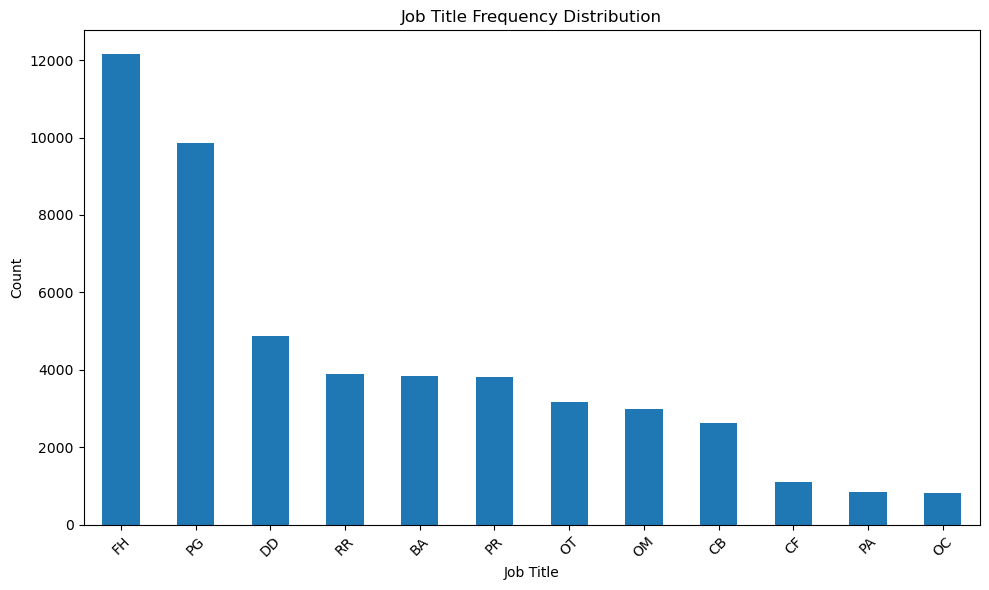

In [128]:
#Bar Chart for Job_Title Distribution
plt.figure(figsize=(10,6))
df1['Job_Title'].value_counts().plot(kind='bar')
plt.title("Job Title Frequency Distribution")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [130]:
#Top 5 Job Titles
top5 = df['Job_Title'].value_counts().head(5)
print("\nTop 5 Job Titles:")
print(top5)


Top 5 Job Titles:
Job_Title
FH    12162
PG     9863
DD     4862
RR     3892
BA     3845
Name: count, dtype: int64


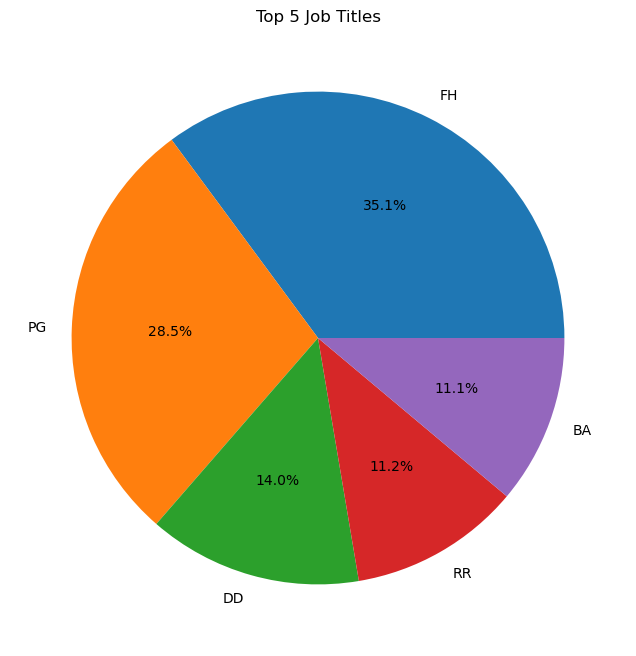

In [131]:
 #Pie Chart for Top 5 Job Titles
plt.figure(figsize=(8,8))
top5.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 Job Titles")
plt.ylabel("")
plt.show()

## Insight from Income 

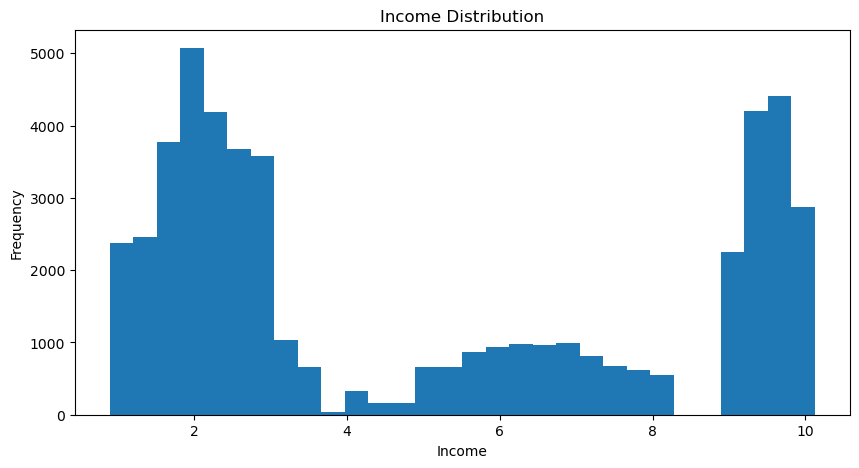

In [132]:
#Histogram chart for income
plt.figure(figsize=(10,5))
plt.hist(df1['Income'], bins=30)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Income groups may be split into two clusters (e.g., low-income & high-income).
#Could be useful for customer segmentation or clustering

## Insight from Rating

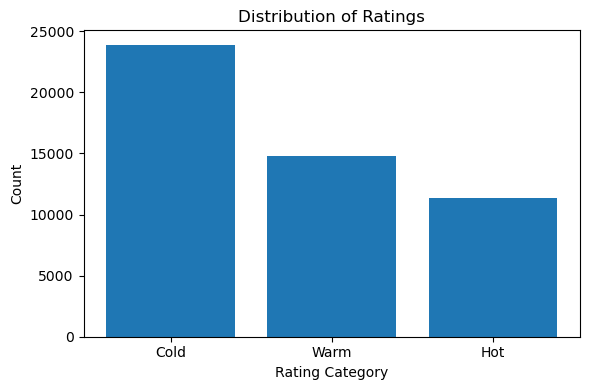

In [134]:
# Value counts
rating_counts = df['Rating'].value_counts()

#Bar chart for Rating
plt.figure(figsize=(6,4))
plt.bar(rating_counts.index, rating_counts.values)

plt.title("Distribution of Ratings")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

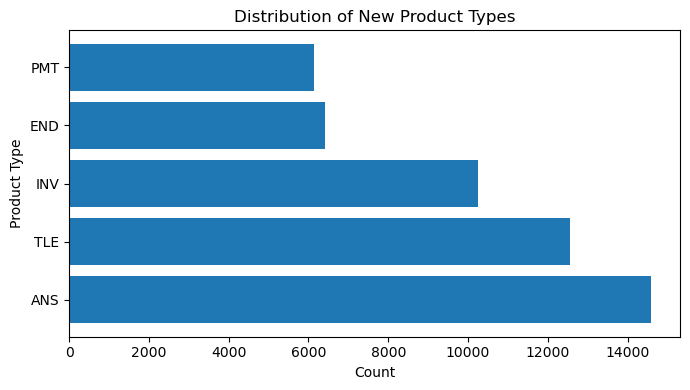

In [135]:
# Getting value counts
prod_counts = df['New_Product_Type'].value_counts()

# Plot
plt.figure(figsize=(7,4))
plt.barh(prod_counts.index, prod_counts.values)

plt.title("Distribution of New Product Types")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show()

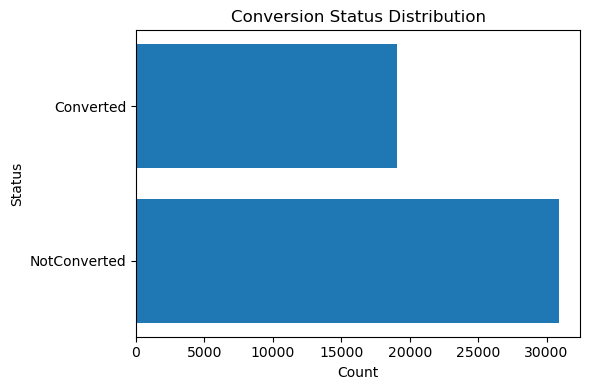

In [136]:
conv_counts = df['Converted'].value_counts()

plt.figure(figsize=(6,4))
plt.barh(conv_counts.index, conv_counts.values)

plt.title("Conversion Status Distribution")
plt.xlabel("Count")
plt.ylabel("Status")
plt.tight_layout()
plt.show()